In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import numpy as np
from keras.preprocessing import image
from matplotlib import pyplot



In [4]:
img_width,img_height =800,600
train_data_dir='dataset/train'
validation_data_dir='dataset/test'
batch_size=8

In [5]:
if K.image_data_format() == 'channels_first' :
    input_shape = (3,img_width,img_height)
else:
    input_shape = (img_width,img_height,3)

In [6]:
train_datagen = ImageDataGenerator(
     rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    featurewise_center=True,
    featurewise_std_normalization=True,
    brightness_range=[0.5, 1.5]
)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [7]:
train_generator = train_datagen.flow_from_directory(
     train_data_dir,
     target_size=(img_width,img_height),
     batch_size=batch_size,
     class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
     validation_data_dir,
     target_size=(img_width,img_height),
     batch_size=batch_size,
     class_mode='categorical')

Found 2269 images belonging to 4 classes.
Found 641 images belonging to 4 classes.


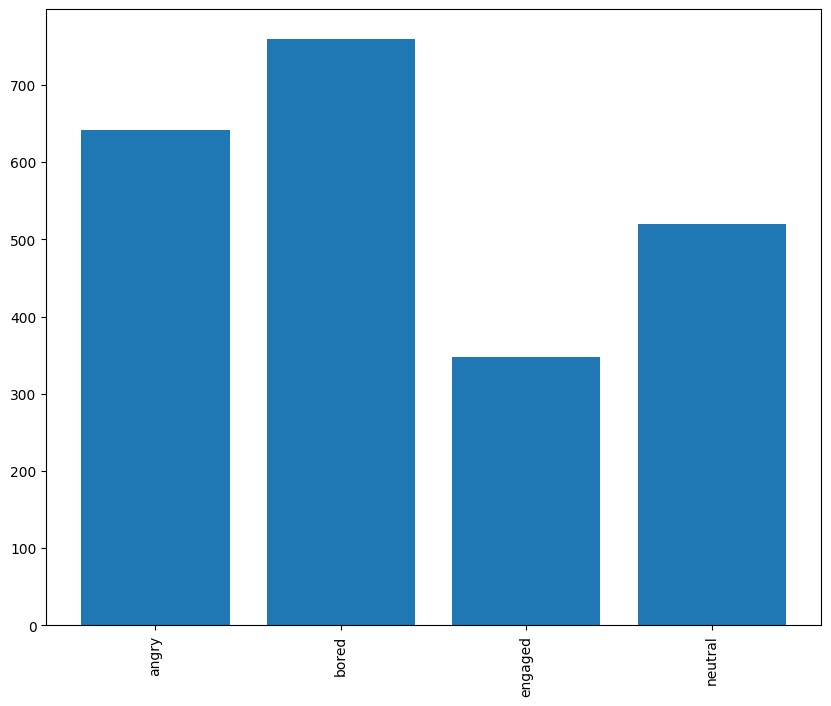

In [11]:
# plot the number of images in each class in the training dataset
from os import listdir
from matplotlib import pyplot

# create a bar graph of the number of images per class in the dataset
def plot_distribution(train_generator):
    # get the total number of images per class
    counts = [train_generator.classes.tolist().count(i) for i in range(train_generator.num_classes)]
    # get the class labels
    labels = list(train_generator.class_indices.keys())
    # create the figure
    fig = pyplot.figure(figsize=(10,8))
    pyplot.bar(labels, counts)
    pyplot.xticks(rotation=90)
    pyplot.show()

plot_distribution(train_generator)





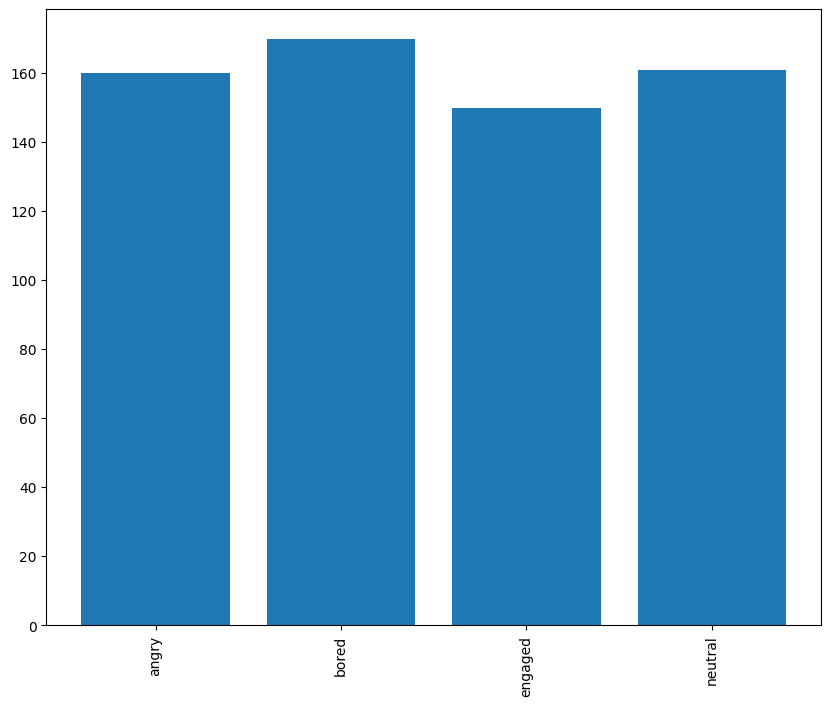

In [12]:
# plot the number of images in each class in the test dataset

# create a bar graph of the number of images per class in the dataset

def plot_distribution(validation_generator):
    # get the total number of images per class
    counts = [validation_generator.classes.tolist().count(i) for i in range(validation_generator.num_classes)]
    # get the class labels
    labels = list(validation_generator.class_indices.keys())
    # create the figure
    fig = pyplot.figure(figsize=(10,8))
    pyplot.bar(labels, counts)
    pyplot.xticks(rotation=90)
    pyplot.show()

plot_distribution(validation_generator)

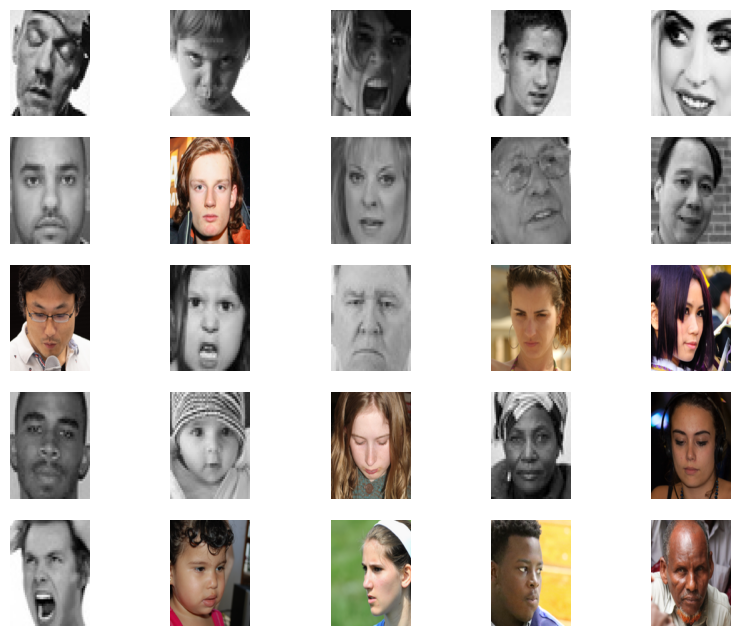

In [34]:
# Present a collection of 25 images in a 5 × 5 grid,
# with the entire grid sized to fit within the confines of a standard letter-sized page.
# Ensure that the images are randomly chosen from each class upon every code execution. 
# This visual representation aids in understanding the dataset’s content and helps identify any noticeable anomalies or potential mislabelings.

import random

# randomly select 25 images from each training class

random_images = [] 


def plot_random_images(train_generator):
    # get the class labels
    labels = list(train_generator.class_indices.keys())
    # get the total number of images per class
    counts = [train_generator.classes.tolist().count(i) for i in range(train_generator.num_classes)]
    # create the figure
    fig = pyplot.figure(figsize=(10,8))
    # define number of rows and columns
    rows = 5
    columns = 5
    # plot images
    for i in range(1, rows*columns +1):
        # select a random image
        index = random.randint(0, len(train_generator.filenames))
        
        random_images.append(train_generator.filepaths[index])

        # get the image path
        path = train_generator.filepaths[index]
        # read the image data and resize to the required size
        img = image.load_img(path, target_size=(img_width, img_height))
        # convert the image to a numpy array
        img = image.img_to_array(img)
        # display the image
        fig.add_subplot(rows, columns, i)
        pyplot.imshow(img.astype(np.uint8))
        pyplot.axis('off')
    # show the figure
    pyplot.show()

plot_random_images(train_generator)



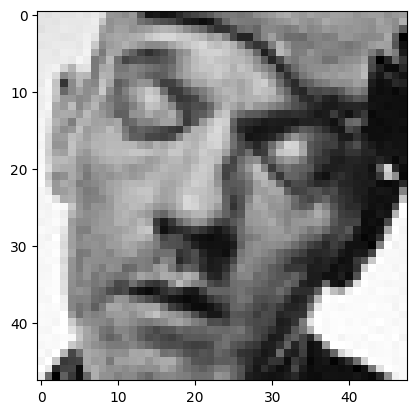

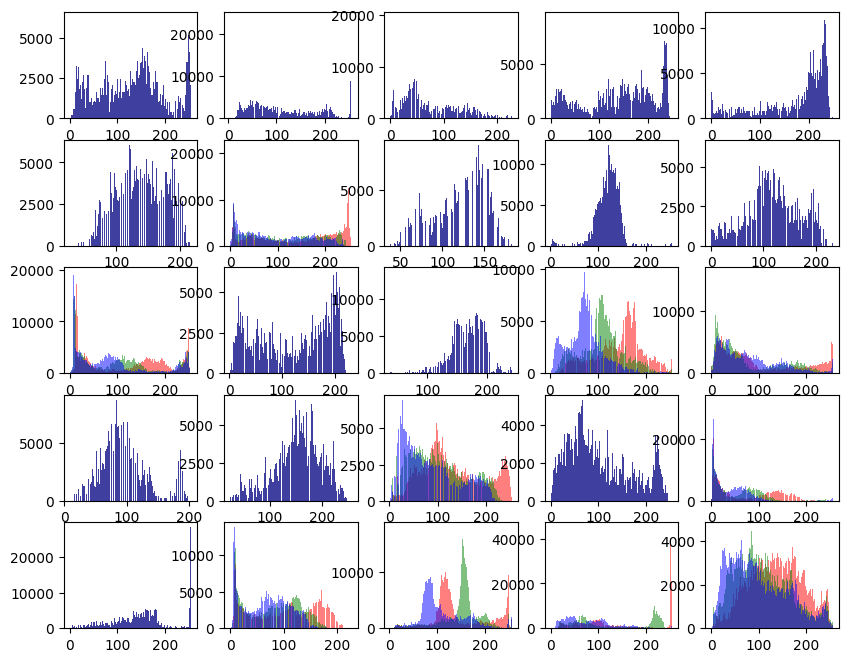

In [35]:
#for the same random images, plot a histogram showing distribution of pixel densities 
# this can provide insight into variations in lighting conditions among the images 
# for RBG images , provide intensity distribution of each colour in separate plots

# plot a histogram showing distribution of pixel densities

#show the first random image
pyplot.imshow(image.load_img(random_images[0]))

# plot pixel intensity distribution for the random_images

def plot_pixel_intensity_distribution(random_images):
    # create the figure
    fig = pyplot.figure(figsize=(10,8))
    # define number of rows and columns
    rows = 5
    columns = 5
    # plot images
    for i in range(1, rows*columns +1):
        # get the image path
        path = random_images[i-1]
        # read the image data and resize to the required size
        img = image.load_img(path, target_size=(img_width, img_height))
        # convert the image to a numpy array
        img = image.img_to_array(img)
        # plot pixel intensity distribution for each color channel
        fig.add_subplot(rows, columns, i)
        pyplot.hist(img[:,:,0].flatten(), bins=256, color='red', alpha=0.5)
        pyplot.hist(img[:,:,1].flatten(), bins=256, color='green', alpha=0.5)
        pyplot.hist(img[:,:,2].flatten(), bins=256, color='blue', alpha=0.5)
    # show the figure
    pyplot.show()

plot_pixel_intensity_distribution(random_images)